# Ejercicio: SVD para marginación por estado

Buscaremos representaciones de dimensión uno para los datos de marginación (2010) a nivel municipio de CONAPO.

In [1]:
%autosave 0
import pandas as pd
import numpy as np
from plotnine import *
from numpy.linalg import svd

Autosave disabled


## 1. Tabla por estado

Leemos los datos y vemos una descripción

In [2]:
marginacion = pd.read_csv("../datos/imm-2010.csv")
descrip = pd.read_csv("../datos/imm-2010-descrip.csv", skiprows=2)
pd.set_option('max_colwidth', 200)
descrip

,Variable,Descripción
0,CVE_ENT,Clave de la entidad federativa
1,NOM_ENT,Nombre de la entidad federativa
2,CVE_MUN,Clave del municipio
3,NOM_MUN,Nombre del municipio
4,POB_TOT,Población total
5,ANALF,Porcentaje de población de 15 años o más analfabeta
6,SPRIM,Porcentaje de población de 15 años o más sin primaria completa
7,OVSDE,Porcentaje de ocupantes en viviendas sin drenaje ni excusado
8,OVSEE,Porcentaje de ocupantes en viviendas sin energía eléctrica
9,OVSAE,Porcentaje de ocupantes en viviendas sin agua entubada


In [3]:
marginacion

,CVE_MUN,CVE_ENT,NOM_ENT,NOM_MUN,POB_TOT,ANALF,SPRIM,OVSDE,OVSEE,OVSAE,VHAC,OVPT,PL_5000,PO2SM,IM,GM
0,9012,9,Distrito Federal,Tlalpan,650567,2.25,9.46,0.13,0.23,11.37,26.07,1.46,1.78,25.60,-1.79,Muy bajo
1,9013,9,Distrito Federal,Xochimilco,415007,2.73,9.92,0.19,0.31,6.69,32.80,2.38,1.72,32.72,-1.64,Muy bajo
2,9008,9,Distrito Federal,La Magdalena Contreras,239086,2.65,11.13,0.10,0.09,3.57,30.83,1.36,0.27,26.99,-1.75,Muy bajo
3,9002,9,Distrito Federal,Azcapotzalco,414711,1.63,7.19,0.03,0.01,0.17,23.39,0.60,0.00,24.34,-1.99,Muy bajo
4,9014,9,Distrito Federal,Benito Juarez,385439,0.56,3.06,0.02,0.01,0.04,8.19,0.26,0.00,17.07,-2.34,Muy bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,29045,29,Tlaxcala,Benito Juarez,5687,7.50,19.00,0.25,0.46,0.00,50.19,2.01,0.23,48.43,-1.09,Bajo
2452,4011,4,Campeche,Candelaria,41194,15.78,36.60,13.15,13.93,15.06,54.42,16.10,76.18,75.37,0.66,Alto
2453,4010,4,Campeche,Calakmul,26882,17.87,36.56,7.98,6.44,31.40,64.49,13.48,100.00,79.66,0.84,Alto
2454,23008,23,Quintana Roo,Solidaridad,159310,2.81,11.60,0.24,0.70,1.09,43.78,1.72,2.14,23.52,-1.60,Muy bajo


Calcularemos la tabla a nivel estado. Los pesos serán

In [4]:
marg_tabla = marginacion.loc[:,'ANALF':'PO2SM']
marg_tabla['estado'] = marginacion['NOM_ENT']
wt = marginacion['POB_TOT']
wt

0       650567
1       415007
2       239086
3       414711
4       385439
         ...  
2451      5687
2452     41194
2453     26882
2454    159310
2455     28263
Name: POB_TOT, Length: 2456, dtype: int64

In [5]:
def media_pob(x):
    # esta funcion calcula media ponderada por población 
    return sum(x * wt[x.index]) / sum(wt[x.index])
# usar la función agg
estado_tbl = marg_tabla.groupby('estado').agg(media_pob)
estado_tbl

,ANALF,SPRIM,OVSDE,OVSEE,OVSAE,VHAC,OVPT,PL_5000,PO2SM
estado,,,,,,,,,
Aguascalientes,3.306264,14.912263,1.063495,0.621155,0.987098,30.707388,1.761715,25.160898,34.529712
Baja California,2.596357,12.984929,0.434291,0.950337,3.597223,29.061189,3.393838,10.350712,21.858379
Baja California Sur,3.244108,14.310469,0.945062,2.845517,7.093717,31.806232,5.823362,15.617019,23.727011
Campeche,8.523860,22.823214,6.385887,2.581535,9.761942,46.446567,4.494789,30.876501,46.437342
Chiapas,18.632014,37.977022,5.086461,3.857978,22.330881,55.263814,15.683625,57.856565,72.203496
Chihuahua,3.790204,16.164208,2.581686,3.705986,4.866011,28.838170,3.500596,17.051978,37.033123
Coahuila de Zaragoza,2.656293,12.213400,1.086021,0.534870,1.383793,30.303131,1.424404,12.147327,30.597463
Colima,5.194822,18.562433,0.682401,0.588864,1.166686,31.543874,4.675230,14.474656,32.262774
Distrito Federal,2.121482,8.760678,0.082644,0.079752,1.778340,26.609881,1.076250,0.666523,28.841136


Normalizamos

In [6]:
estado_tbl_est = (estado_tbl - estado_tbl.mean())/ estado_tbl.std()

Con esta tabla vamos calcular la DVS (Descomposición en valores singulares)

## 2. Descomposición en valores singulares

In [7]:
u, s, vt = svd(estado_tbl_est, full_matrices=False)
v = vt.transpose()

Veamos los tamaños de cada componente:

In [8]:
print(u.shape)
print(v.shape)
print(s.shape)

(32, 9)
(9, 9)
(9,)


Veamos cómo se ven las matrices:

In [9]:
v_df = pd.DataFrame(v)
v_df['variable'] = estado_tbl.columns
v_df.set_index('variable')
v_df

,0,1,2,3,4,5,6,7,8,variable
0,0.374013,-0.011257,0.139399,-0.133918,0.115417,-0.325700,0.114815,0.115200,0.822658,ANALF
1,0.365724,-0.013304,0.132519,0.155936,0.183764,-0.487653,0.442142,0.339712,-0.491654,SPRIM
2,0.256297,-0.716184,-0.562706,-0.170773,0.243556,0.032263,-0.076196,-0.077309,-0.058710,OVSDE
3,0.285213,0.370750,-0.666197,0.261797,-0.495249,-0.012512,0.130756,0.032132,0.072688,OVSEE
4,0.347142,0.312726,-0.034856,-0.375800,0.204013,0.399023,-0.334083,0.560717,-0.111352,OVSAE
5,0.325504,-0.265843,0.335850,-0.359656,-0.594709,0.317570,0.328206,-0.105157,-0.088996,VHAC
6,0.347484,0.380859,-0.007728,-0.328115,0.227040,-0.163263,-0.096841,-0.709487,-0.188494,OVPT
7,0.334229,-0.005551,0.148672,0.591681,0.340498,0.563558,0.197308,-0.186921,0.093082,PL_5000
8,0.347003,-0.189119,0.257636,0.362940,-0.292458,-0.224931,-0.707663,-0.023306,-0.090916,PO2SM


In [10]:
u_df = pd.DataFrame(u)
u_df['estado'] = estado_tbl.index
u_df.set_index('estado')
u_df.sort_values(0)

,0,1,2,3,4,5,6,7,8,estado
8,-0.263272,0.028378,0.032436,-0.143101,0.055633,-0.122558,-0.449449,0.113882,0.225594,Distrito Federal
18,-0.247401,0.059135,-0.000085,-0.221695,0.116702,0.037482,0.133574,0.051578,0.138029,Nuevo Leon
1,-0.204897,0.125500,-0.045988,-0.143376,0.105332,-0.017093,0.061065,0.037203,0.012949,Baja California
6,-0.204313,-0.021780,0.038873,-0.037935,0.017115,-0.031683,-0.164268,0.044331,0.088832,Coahuila de Zaragoza
0,-0.161842,-0.032417,0.096738,0.134528,0.087343,0.019204,-0.069695,-0.020090,0.057646,Aguascalientes
13,-0.147418,0.036091,0.031923,-0.043867,0.178368,-0.131229,0.130864,0.186181,-0.048180,Jalisco
7,-0.141104,0.033288,0.117658,-0.052441,0.100842,-0.301872,0.083381,-0.073001,-0.016096,Colima
27,-0.131200,0.048563,0.038697,-0.040863,-0.202724,-0.079299,0.002552,0.019154,-0.104179,Tamaulipas
25,-0.126482,0.060543,-0.023388,-0.087627,-0.102551,0.030081,0.020949,-0.282755,-0.163241,Sonora
2,-0.122165,0.265679,-0.223668,-0.111879,-0.092447,0.076085,0.150981,-0.020840,-0.033246,Baja California Sur


## 3. Calidad de representación

Ahora recordamos que la calidad de la aproximación se puede calcular a partir de los valores singulares

In [11]:
s

array([14.38488715,  4.52930545,  4.34723887,  3.57662951,  2.87492115,
        2.40792012,  1.67269689,  1.42280308,  0.9920257 ])

In [12]:
total = sum(s**2)
acumulado = np.cumsum(s**2) / total
contribucion = s**2 / total
acum_df = pd.DataFrame({'acumulado':acumulado, 'contribucion':contribucion})
acum_df.round(3)

,acumulado,contribucion
0,0.742,0.742
1,0.815,0.074
2,0.883,0.068
3,0.929,0.046
4,0.958,0.030
5,0.979,0.021
6,0.989,0.010
7,0.996,0.007
8,1.000,0.004


Las primeras tres dimensiones tienen calidad de 88\%, y la primera es mucho más importante

## 4. Interpretación

Si en la primera componente todos los valores de u y de v son negativos, podemos multiplicar ambos por -1 sin cambiar nada en la descomposición, y facilitamos la interpretación

In [13]:
if(v[0,0] < 0):
    u[:, 0] = - u[:,0]
    v[:, 0] = - v[:,0]

#scores
u_df = pd.DataFrame(u)
u_df['estado'] = estado_tbl.index
u_df.set_index('estado')
#pesos
v_df = pd.DataFrame(v)
v_df['variable'] = estado_tbl.columns
v_df.set_index('variable')

v_df.round(2).sort_values(1)


,0,1,2,3,4,5,6,7,8,variable
2,0.26,-0.72,-0.56,-0.17,0.24,0.03,-0.08,-0.08,-0.06,OVSDE
5,0.33,-0.27,0.34,-0.36,-0.59,0.32,0.33,-0.11,-0.09,VHAC
8,0.35,-0.19,0.26,0.36,-0.29,-0.22,-0.71,-0.02,-0.09,PO2SM
0,0.37,-0.01,0.14,-0.13,0.12,-0.33,0.11,0.12,0.82,ANALF
1,0.37,-0.01,0.13,0.16,0.18,-0.49,0.44,0.34,-0.49,SPRIM
7,0.33,-0.01,0.15,0.59,0.34,0.56,0.20,-0.19,0.09,PL_5000
4,0.35,0.31,-0.03,-0.38,0.20,0.40,-0.33,0.56,-0.11,OVSAE
3,0.29,0.37,-0.67,0.26,-0.50,-0.01,0.13,0.03,0.07,OVSEE
6,0.35,0.38,-0.01,-0.33,0.23,-0.16,-0.10,-0.71,-0.19,OVPT


Ahora nótese que:

1. La primera componente es un promedio ponderado de todas las variables. Este es un índice de marginación a nivel estado.
2. La segunda componente tiene valores altos para las variable de piso de tierra, carencia de electiricidad y agua entubada, y valores negativos para carencia de drenaje.

Por lo tanto:

1. Aquellos estados con score alto en la primera componente tienden a tener niveles altos en todas las variables: son estados más marginados
2. Aquellos estados con score alto en la segunda componente tienden a tener realtivamente más carencia de electricidad, agua y piso de tierra (infraestructura básica). Los de score negativo más bien tienen carencia de drenaje (¿por qué es diferente drenaje a agua entubada por ejemplo?), hacinamiento y bajos salarios.

Veamos los estados en las primeras dos dimensiones:

In [21]:
#import sys
#!{sys.executable} -m pip install adjustText

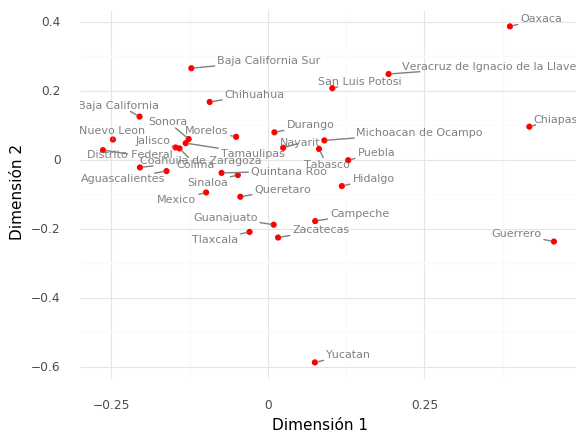

<ggplot: (8740468973453)>

In [22]:
import plotnine
plotnine.theme_set(plotnine.theme_minimal())
from adjustText import adjust_text

u_graf = u_df.copy()
u_graf.columns = u_graf.columns.astype('str')
u_graf.reset_index(inplace=True)
adjust_pars = {'expand_points': (1.5, 1.5), 'arrowprops': {'arrowstyle': '-', 'color':'gray'}}
(ggplot(u_graf, aes('0', '1', label = 'estado')) + geom_point(color="red") + 
    geom_text(size=8, color="gray", adjust_text = adjust_pars) +
    xlab('Dimensión 1') + ylab('Dimensión 2') )

**Pregunta 1**: compara baja california sur con Tlaxcala, que son similares en marginación pero tienen
muy distintos valores en la dimensión 2 

**Pregunta 2**: puedes explicar por qué Yucatán sale tan bajo en la dimensión 2?


In [26]:
# pregunta 1
estado_tbl.loc[('Baja California Sur' , 'Tlaxcala'), :].round(2)
estado_tbl_est.loc[('Baja California Sur' , 'Tlaxcala'), :].round(2)


,ANALF,SPRIM,OVSDE,OVSEE,OVSAE,VHAC,OVPT,PL_5000,PO2SM
estado,,,,,,,,,
Baja California Sur,-0.84,-0.87,-0.77,0.65,-0.13,-0.77,-0.10,-0.91,-1.37
Tlaxcala,-0.38,-0.68,-0.32,-0.73,-0.90,0.90,-0.54,0.35,1.01


Son diferentes principalemnte en drenaje, electricidad, aguan entubada, hacinamiento y PL5000 y P02SM. 

- BCS tiene más carencias en electricidad, agua entubada y piso de tierra
- Tlaxcala tiene más carencias en drenaje, hacinamiento y bajos salarios

In [28]:
#  pregunta 2 agregamos yucatán
estado_tbl_est.loc[('Yucatan','Baja California Sur' , 'Tlaxcala'), :].round(2)


,ANALF,SPRIM,OVSDE,OVSEE,OVSAE,VHAC,OVPT,PL_5000,PO2SM
estado,,,,,,,,,
Yucatan,0.59,0.77,2.22,-0.18,-0.80,0.92,-0.73,-0.26,1.09
Baja California Sur,-0.84,-0.87,-0.77,0.65,-0.13,-0.77,-0.10,-0.91,-1.37
Tlaxcala,-0.38,-0.68,-0.32,-0.73,-0.90,0.90,-0.54,0.35,1.01


- Yucatán tiene más marginación en general, pero su score de drenaje es especialmente bajo (que tiene peso negativo en la dimensión 2)

Podemos colorear estas tablas para examinarlas mejor:

In [37]:
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'gray'
    if val < -0.2:
        color = 'red'
    if val > 0.2:
        color= 'black'
    return 'color: %s' % color

tabla_color = estado_tbl_est.loc[('Yucatan','Baja California Sur' , 'Tlaxcala'), :]. \
    round(1). \
    style.applymap(color_negative_red)
tabla_color

,ANALF,SPRIM,OVSDE,OVSEE,OVSAE,VHAC,OVPT,PL_5000,PO2SM
estado,,,,,,,,,
Yucatan,0.6,0.8,2.2,-0.2,-0.8,0.9,-0.7,-0.3,1.1
Baja California Sur,-0.8,-0.9,-0.8,0.6,-0.1,-0.8,-0.1,-0.9,-1.4
Tlaxcala,-0.4,-0.7,-0.3,-0.7,-0.9,0.9,-0.5,0.4,1


## 5. Verificar SVD

Finalmente, verificamos que en efecto se cumple la SVD para estos datos cuando usamos todas las dimensiones

In [20]:
# hacer el cálculo de la svd
approx = np.matmul(u * s, v.transpose())
# ver que son iguales
np.max(abs(estado_tbl_est.values - approx)).round(10)

0.0